In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
import numpy as np

df = pd.read_csv("geom_analyze_results.csv", header=0)
dfb = pd.read_csv("bare_surface_ratio/bare_ratio.csv")

df_layered = pd.read_csv("../layered_structures/layered_energy.txt", header=0)

# binding site energy difference
dfe = pd.read_csv("../energy.txt", header=0)

font = {"size"   : 18,
        "family" : "Arial"}
plt.rc("font", **font)

full_tet = df[(df["coverage"] == "full") & (df["binding_site"] == "tet")]
full_int = df[(df["coverage"] == "full") & (df["binding_site"] == "int")]
half_tet = df[(df["coverage"] == "half") & (df["binding_site"] == "tet")]
half_int = df[(df["coverage"] == "half") & (df["binding_site"] == "int")]

full_tet = full_tet.reset_index(drop=True)
full_int = full_int.reset_index(drop=True)
half_tet = half_tet.reset_index(drop=True)
half_int = half_int.reset_index(drop=True)

energy_full_tet = dfe[(dfe["coverage"] == "full") & (dfe["binding site"] == "tet")]
energy_full_int = dfe[(dfe["coverage"] == "full") & (dfe["binding site"] == "int")]
energy_half_tet = dfe[(dfe["coverage"] == "half") & (dfe["binding site"] == "tet")]
energy_half_int = dfe[(dfe["coverage"] == "half") & (dfe["binding site"] == "int")]

energy_full_tet = energy_full_tet.reset_index(drop=True)
energy_full_int = energy_full_int.reset_index(drop=True)
energy_half_tet = energy_half_tet.reset_index(drop=True)
energy_half_int = energy_half_int.reset_index(drop=True)

lenergy_full_tet = df_layered[(df_layered["coverage"] == "full") & (df_layered["binding site"] == "tet")]
lenergy_full_int = df_layered[(df_layered["coverage"] == "full") & (df_layered["binding site"] == "int")]
lenergy_full_tet = lenergy_full_tet.reset_index(drop=True)
lenergy_full_int = lenergy_full_int.reset_index(drop=True)

# at 25L, 33L half coverage formate molecules diffuse between binding sites
energy_half_tet.loc[energy_half_tet['thickness_layer'].isin([25, 33]), 'energy_kcal/mol'] = np.nan
energy_half_int.loc[energy_half_int['thickness_layer'].isin([25, 33]), 'energy_kcal/mol'] = np.nan

# Provided data
md_full1 = ['0.010600', '-0.008287', '-0.006794', '-0.016430', '0.017707', '-0.010191', '-0.010576', '0.017249']
Emd_full = [0.008256, 0.009220, 0.012207, 0.011368, 0.016105, 0.017169, 0.019087, 0.018249]

#md_half = ['0.179190', '0.151774', '0.130911', '0.191139', '0.173216', '0.125178']
md_half1 = ['0.179190', '0.151774', None, None, '0.173216', '0.125178', '0.137705', '0.134284']
Emd_half = [0.014821, 0.020217,  float('NaN'),  float('NaN'), 0.030315, 0.039984, 0.033349, 0.038398]


thickness = ['9', '17', '25', '33', '41', '49', '57', '65']

# Convert data to appropriate types and create the DataFrame
md = {
    'thickness': [int(x) for x in thickness],
    'md_full': [float(x) if x is not None else None for x in md_full1],  # Handling None for the missing value
    'md_half': [float(x) if x is not None else None for x in md_half1]
}

md = pd.DataFrame(md)

md_full = md["md_full"]
md_half = md["md_half"]

FileNotFoundError: [Errno 2] No such file or directory: 'bare_surface_ratio/bare_ratio.csv'

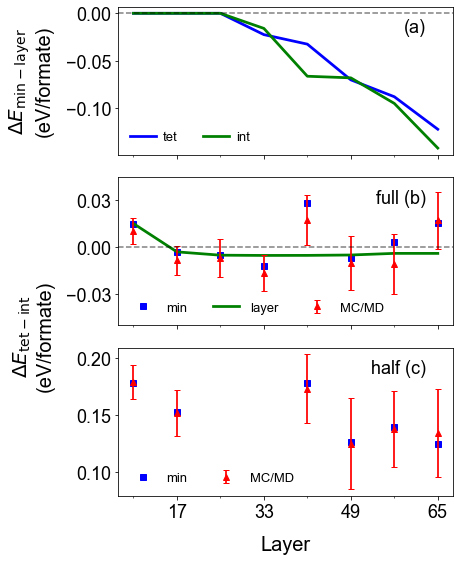

In [16]:
fig, axis = plt.subplots(3, 1, figsize=(6, 9), facecolor="w", 
                         sharex=True)

#################### plot 0
axis[0].plot(energy_full_int["thickness_layer"], 
         (((energy_full_tet["energy_kcal/mol"]-lenergy_full_tet["energy_kcal/mol"])*0.0433641153087705))/36,
         "blue", ls="-", linewidth=2.75, label=r"tet")

axis[0].plot(energy_full_int["thickness_layer"], 
         (((energy_full_int["energy_kcal/mol"]-lenergy_full_int["energy_kcal/mol"])*0.0433641153087705))/36,
         "green", ls="-", linewidth=2.75, label=r"int")


axis[0].axhline(y = 0, color = 'black', linestyle = '--', linewidth=1.5, alpha=0.5)

#axis[0].axhline(y = 0, color = 'black', linestyle = ':', linewidth=3)

axis[0].set_ylabel(r"${\Delta E}_\mathrm{min-layer}$"
               "\n"r"(eV/formate)", labelpad=12, fontsize=20)

axis[0].set_yticks([0.0, -0.05, -0.1])
axis[0].set_xticks([9,17,25,33,41,49,57,65], minor=True)
axis[0].set_xticks([17,33,49,65])

#################### plot 1
axis[1].plot(energy_full_int["thickness_layer"], 
         (((energy_full_tet["energy_kcal/mol"]-energy_full_int["energy_kcal/mol"])*0.0433641153087705))/36,
         "blue", linestyle='None', label=r"min", marker="s")

axis[1].plot(lenergy_full_int["thickness_layer"], 
         (((lenergy_full_tet["energy_kcal/mol"]-lenergy_full_int["energy_kcal/mol"])*0.0433641153087705))/36,
         "green", ls="-", linewidth=2.75, label=r"layer")


axis[1].errorbar(md["thickness"], md_full, yerr=Emd_full, color="red", fmt='^', capsize=3, linewidth=1.75, label=r"MC/MD")

axis[1].axhline(y = 0, color = 'black', linestyle = '--', linewidth=1.5, alpha=0.5)

#axis[1].set_ylabel(r"${\Delta E}_\mathrm{tet-int}$"
#                                "\n"r"(eV/formate)", labelpad=12, fontsize=18)

axis[1].set_ylim([-0.05, 0.045])
axis[1].set_yticks([-0.03,0,0.03])

################## plot 2

delta_E = ((energy_half_tet["energy_kcal/mol"]-energy_half_int["energy_kcal/mol"])*0.0433641153087705)/18
mask = np.isfinite(delta_E)

axis[2].plot(energy_half_int["thickness_layer"], delta_E,
         "blue", label=r"min", marker='s', linestyle='None')

#axis[2].plot(energy_half_int["thickness_layer"][mask], delta_E[mask],
#         "green", marker='s')

axis[2].set_ylabel(r"${\Delta E}_\mathrm{tet-int}$"
                                "\n"r"(eV/formate)", labelpad=24, fontsize=20)

axis[2].yaxis.set_label_coords(-0.19,1.08)

#axis[2].set_ylim([0.1, 0.2])
#axis[2].set_yticks([0.1, 0.2, 0.3,])

mask1 = np.isfinite(md_half)

#axis[2].plot(md["thickness"], md_half,
#         "red", linestyle='None', label=r"MC/MD")

axis[2].plot(md["thickness"][mask1], md_half[mask1],
         "red", linestyle='None', ms='6')

axis[2].errorbar(md["thickness"], md_half, yerr=Emd_half, color="red", fmt='^', capsize=3, 
                 linestyle='None', linewidth=1.75, label=r"MC/MD")

##########################

# grid lines
#for x in range (0, 3):    
#    axis[x].yaxis.grid(which='minor', color='gray', 
#                       linestyle='dotted', alpha=0.5)
#    axis[x].xaxis.grid(which='minor', color='gray', 
#                       linestyle='dotted', alpha=0.5)
#    axis[x].yaxis.grid(which='major', color='gray', 
#                       linestyle='dotted', alpha=0.5)
#    axis[x].yaxis.grid(which='major', color='gray', 
#                       linestyle='dotted', alpha=0.5)
    
    
axis[0].legend(loc="lower left", frameon=False, ncol=2, fontsize=13, 
               handlelength=2, handletextpad=0.5, markerscale=1)
    
#axis[1].legend(loc="lower center", frameon=False, fontsize=12, 
#               handlelength=2, handletextpad=0.5, markerscale=1,
#               ncol=2)

#axis[2].legend(loc="lower center", frameon=False, fontsize=15, 
#               handlelength=2, handletextpad=0.5, markerscale=1,
#               ncol=2)

axis[1].legend(loc="lower left", ncol=3, frameon=False, fontsize=13)

axis[2].legend(loc="lower left", ncol=3, frameon=False, fontsize=13)



axis[2].set_xlabel("Layer", labelpad=14, fontsize=20)

fig.subplots_adjust(hspace=0.15)

# Add text in the top right corner
axis[0].text(0.92, 0.92, '(a)', transform=axis[0].transAxes, 
             ha='right', va='top', fontsize=18)

axis[1].text(0.92, 0.92, 'full (b)', transform=axis[1].transAxes, 
             ha='right', va='top', fontsize=18)

axis[2].text(0.92, 0.92, 'half (c)', transform=axis[2].transAxes, 
             ha='right', va='top', fontsize=18)



#fig.savefig('energy.pdf',format='pdf', bbox_inches = "tight")
#fig.savefig('energy.png', dpi=600.0,format='png', bbox_inches = "tight")
#fig.savefig('energy.svg', format='svg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axis = plt.subplots(3, 1, figsize=(6, 9), facecolor="w", sharex=True)

#################### plot 0
axis[0].plot(energy_full_int["thickness_layer"], 
         (((energy_full_tet["energy_kcal/mol"]-lenergy_full_tet["energy_kcal/mol"])*0.0433641153087705))/36,
         "blue", ls="-", linewidth=2.75, label=r"tet")

axis[0].plot(energy_full_int["thickness_layer"], 
         (((energy_full_int["energy_kcal/mol"]-lenergy_full_int["energy_kcal/mol"])*0.0433641153087705))/36,
         "green", ls="-", linewidth=2.75, label=r"int")

axis[0].axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

axis[0].set_ylabel(r"${\Delta E}_\mathrm{minimized-layered}$"
                   "\n"r"(eV/formate)", labelpad=12, fontsize=20)

axis[0].set_yticks([0.0, -0.05, -0.1])
axis[0].set_xticks([9, 17, 25, 33, 41, 49, 57, 65], minor=True)
axis[0].set_xticks([17, 33, 49, 65])

# Add text in the top right corner
axis[0].text(0.95, 0.95, '1', transform=axis[0].transAxes, 
             ha='right', va='top', fontsize=16)

#################### plot 1
axis[1].plot(energy_full_int["thickness_layer"], 
         (((energy_full_tet["energy_kcal/mol"]-energy_full_int["energy_kcal/mol"])*0.0433641153087705))/36,
         "blue", linestyle='None', label=r"minimized", marker="s")

axis[1].plot(lenergy_full_int["thickness_layer"], 
         (((lenergy_full_tet["energy_kcal/mol"]-lenergy_full_int["energy_kcal/mol"])*0.0433641153087705))/36,
         "green", ls="-", linewidth=2.75, label=r"layered")

axis[1].errorbar(md["thickness"], md_full, yerr=Emd_full, color="red", fmt='^', capsize=3, linewidth=1.75, label=r"MC/MD")

axis[1].axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

axis[1].set_ylabel(r"${\Delta E}_\mathrm{tet-int}$"
                   "\n"r"(eV/formate)", labelpad=12, fontsize=18)

axis[1].set_ylim([-0.05, 0.045])
axis[1].set_yticks([-0.03, 0, 0.03])

# Add text in the top right corner
axis[1].text(0.95, 0.95, '2', transform=axis[1].transAxes, 
             ha='right', va='top', fontsize=16)

################## plot 2
delta_E = ((energy_half_tet["energy_kcal/mol"] - energy_half_int["energy_kcal/mol"]) * 0.0433641153087705) / 18
mask = np.isfinite(delta_E)

axis[2].plot(energy_half_int["thickness_layer"], delta_E,
             "blue", label=r"minimized", marker='s', linestyle='None')

mask1 = np.isfinite(md_half)

axis[2].plot(md["thickness"][mask1], md_half[mask1],
             "red", linestyle='None', ms='6')

axis[2].errorbar(md["thickness"], md_half, yerr=Emd_half, color="red", fmt='^', capsize=3, 
                 linestyle='None', linewidth=1.75, label=r"MC/MD")

# Add text in the top right corner
axis[2].text(0.95, 0.95, '3', transform=axis[2].transAxes, 
             ha='right', va='top', fontsize=16)

##########################

# Grid lines (optional)
# for x in range(0, 3):    
#     axis[x].yaxis.grid(which='minor', color='gray', linestyle='dotted', alpha=0.5)
#     axis[x].xaxis.grid(which='minor', color='gray', linestyle='dotted', alpha=0.5)
#     axis[x].yaxis.grid(which='major', color='gray', linestyle='dotted', alpha=0.5)
#     axis[x].xaxis.grid(which='major', color='gray', linestyle='dotted', alpha=0.5)

axis[0].legend(loc="lower left", frameon=False, ncol=2, fontsize=13, 
               handlelength=2, handletextpad=0.5, markerscale=1)

axis[1].legend(loc="lower left", ncol=3, frameon=False, fontsize=13)

# Add a shared y-label for plots 2 and 3
axis[2].set_xlabel("Layer", labelpad=14, fontsize=20)

fig.text(0.04, 0.5, r"${\Delta E}_\mathrm{tet-int}$ (eV/formate)", 
         ha='center', va='center', rotation='vertical', fontsize=20)

fig.subplots_adjust(hspace=0.15)

fig.savefig('energy.pdf', format='pdf', bbox_inches="tight")
fig.savefig('energy.png', dpi=600.0, format='png', bbox_inches="tight")
fig.savefig('energy.svg', format='svg')

In [ ]:
fig,axs = plt.subplots(facecolor="w")

axs.plot(energy_full_int["thickness_layer"], 
         (((energy_full_tet["energy_kcal/mol"]-lenergy_full_tet["energy_kcal/mol"])*0.0433641153087705))/36,
         "blue", marker="x", ms=12, mew=4, linewidth=4, label=r"tet")

axs.plot(energy_full_int["thickness_layer"], 
         (((energy_full_int["energy_kcal/mol"]-lenergy_full_int["energy_kcal/mol"])*0.0433641153087705))/36,
         "green", marker="x", ms=12, mew=4, linewidth=4, label=r"int")

plt.axhline(y = 0, color = 'black', linestyle = ':', linewidth=3)

axs.set_ylabel(r"${\Delta E}_\mathrm{min-layered}$"
               "\n"r"(eV/formate)", labelpad=12, fontsize=20)

axs.set_xticks([10, 30, 50])
#axs.set_ylim([-0.02, 0.03])

axs.set_xlabel("Layer", labelpad=14, fontsize=20)
axs.legend(loc="best", frameon=False, fontsize=20, 
           handlelength=2, handletextpad=0.5, markerscale=1)

fig.savefig('layered_vs_min_comparison.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('layered_vs_min_comparison.png', dpi=600.0,format='png', bbox_inches = "tight")


In [ ]:
fig,axs = plt.subplots(facecolor="w")

axs.plot(energy_half_int["thickness_layer"].drop(3).drop(2), 
         (((energy_half_int["energy_kcal/mol"].drop(3).drop(2)-energy_half_tet["energy_kcal/mol"].drop(3).drop(2))*0.0433641153087705))/18,
         "blue", marker="x", ms=12, mew=4, linewidth=4, label=r"half coverage")

plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth=3)

axs.set_ylabel(r"${\Delta E}_\mathrm{tet-int}$"
               "\n"r"(eV/formate)", labelpad=12, fontsize=20)

axs.set_xticks([10, 30, 50])
#axs.set_ylim([-0.02, 0.03])

axs.set_xlabel("Layer", labelpad=14, fontsize=20)
axs.legend(loc="best", frameon=False, fontsize=20, 
           handlelength=2, handletextpad=0.5, markerscale=1)

fig.savefig('half_coverage.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('half_coverage.png', dpi=600.0,format='png', bbox_inches = "tight")

In [ ]:
fig,axs = plt.subplots(facecolor="w")

axs.plot(full_tet["layer"], full_tet["nFe2"]/(full_tet["nFe3"]+full_tet["nFe2"]), 
         marker="x", ms=6, mew=3, linewidth=3, label=r"full-coverage", color="green")

axs.plot(half_tet["layer"], half_tet["nFe2"]/(half_tet["nFe3"]+half_tet["nFe2"]), 
         marker="x", ms=6, mew=3, linewidth=3, label=r"half-coverage", linestyle="dashed", color="blue")

axs.plot(dfb["layer"], dfb["nFe2"]/(dfb["nFe3"]+dfb["nFe2"]), 
         linewidth=3, label=r"bare", linestyle="-", color="black")

axs.set_ylabel(r"$n_{\mathrm{Fe}}^\mathrm{2+}/n_{\mathrm{Fe}}^\mathrm{3+}$",
                   labelpad=14, fontsize=20)

axs.set_xticks([10, 30, 50])
#axs.set_ylim([-0.02, 0.03])

axs.set_xlabel("Layer", labelpad=14, fontsize=20)

axs.legend(loc="best", frameon=False, fontsize=20, 
           handlelength=2, handletextpad=0.5, markerscale=1)

In [ ]:
nextraFe3 = 18

fig,axs = plt.subplots(facecolor="w")

p = 1.050 # qFe(II)
q = 1.575 # qFe(III)

#################
### (001)-dbt ###
#################

# create array with atoms in different thick slabs
nFeO = arange(864,0,-36)                     # nFeO
nFeT = arange(414,0,-18)                     # nFeT
nO   = arange(1728,0,-72)                    # O

print("nFeO: ", nFeO)
print("nFeT: ", nFeO)
print("nO: ", nFeO)

nFeO = nFeO[:min([len(nFeO),len(nFeT),len(nO)])]
nFeT = nFeT[:min([len(nFeO),len(nFeT),len(nO)])]
nO   =   nO[:min([len(nFeO),len(nFeT),len(nO)])]

lz   = linspace(48.834,48.834-2.120*(len(nFeO)-1),len(nFeO))  # thickness of slab
l = linspace(47,3,23)

print("lz: ", lz)
print("l: ", l)

r = array([])
r1 = array([])
r2 = array([])

for a,b,c,d in zip(nFeO,nFeT,nO,l):
  
  # nFeT(II)/nFeT(III)
  y = arange(0,b+1,50)/float(b) 

  # nFeO(II)/nFeO(III)
  x = (-a*q -b*p*y +b*q*y -b*q +c*p) / (a*p - a*q)

  # bare surface nfe2/nfe3
  r = append(r,mean((a*x+b*y)/(a*(1.-x)+b*(1.-y))))
  
  # full coverage with 18 excess fe3 
  r1 = append(r1,mean(((a*x+b*y)-18.)/(a*(1.-x)+b*(1.-y)+18.)))

  # half coverage with 9 excess fe3 
  r2 = append(r2,mean(((a*x+b*y)-9.)/(a*(1.-x)+b*(1.-y)+9.)))

  #print("nFe_tot", a+b)
  #print("nFe_2+", a*x+b*y)
  #print("nFe_3+", a*(1.-x)+b*(1.-y))
  #print("nFe_2/nFe_3", mean((a*x+b*y)/(a*(1.-x)+b*(1.-y))))
  #print("nFe_2/nFe_3 with excess", r2)

  #print("##############")

  #print("nFeT(II)/nFeT(III)", y)
  #print("nFeT(II)/nFeT(III)", x)

# plot data according to eq. in manuscript
axs.plot(l,r,label='(001)-DBT / bare',color='blue', linestyle='solid', linewidth=4)
axs.plot(l,r2,label='(001)-DBT / fa-half-cover.',color='blue',linestyle='dashed', linewidth=4)
axs.plot(l,r1,label='(001)-DBT / fa-full-cover.',color='blue', linestyle='dotted', linewidth=4)



axs.axhline(0.5,linestyle='--',color='k',
               label=r'Ideal $\mathrm{Fe}_3 \mathrm{O}_4$', 
               linewidth=3)
axs.legend(framealpha=0.0, ncol=1, loc='best', fontsize=14)

In [ ]:
for label, ax in axis.items():
    # Use Axes.annotate to put the label
    # - at the top left corner (axes fraction (0, 1)),
    # - offset half-a-fontsize right and half-a-fontsize down
    #   (offset fontsize (+0.5, -0.5)),
    # i.e. just inside the axes.
    ax.annotate(
        label,
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))


In [ ]:
axis[0].plot(full_tet["layer"], full_tet["nFe2"]/(full_tet["nFe3"]+full_tet["nFe2"]), marker="x", ms=6, mew=3, linewidth=3, label=r"full-tet", color="olive")
axis[0].plot(half_tet["layer"], half_tet["nFe2"]/(half_tet["nFe3"]+half_tet["nFe2"]), marker="x", ms=6, mew=3, linewidth=3, label=r"half-tet", linestyle="dashed", color="olive")

axis[0].plot(full_int["layer"], full_int["nFe2"]/(full_int["nFe3"]+full_int["nFe2"]), marker="x", ms=6, mew=3, linewidth=3, label=r"full-int", color="purple")
axis[0].plot(half_int["layer"], half_int["nFe2"]/(half_int["nFe3"]+half_int["nFe2"]), marker="x", ms=6, mew=3, linewidth=3, label=r"half-int", linestyle="dashed", color="purple")

axis[0].set_ylabel(r"$n_{\mathrm{Fe}}^\mathrm{2+}/n_{\mathrm{Fe}}^\mathrm{3+}$",
                   fontsize=16)

In [ ]:
axis[1].plot(full_tet["layer"], full_tet["avg_thickness"]/((full_tet["layer"]+1)/2), marker="x", ms=6, mew=3, linewidth=3, label=r"full-tet", color="olive")
axis[1].plot(half_tet["layer"], half_tet["avg_thickness"]/((half_tet["layer"]+1)/2), marker="x", ms=6, mew=3, linewidth=3, label=r"half-tet", linestyle="dashed", color="olive")

axis[1].plot(full_int["layer"], full_int["avg_thickness"]/((full_int["layer"]+1)/2), marker="x", ms=6, mew=3, linewidth=3, color="purple")
axis[1].plot(half_int["layer"], half_int["avg_thickness"]/((half_int["layer"]+1)/2), marker="x", ms=6, mew=3, linewidth=3, linestyle="dashed", color="purple")

axis[1].set_ylabel(r"$<d_\mathrm{oct}>\, (\AA)$",
                   fontsize=16)

In [ ]:
axis[2].plot(full_tet["layer"], full_tet["avg_O_Feoct_dist"], marker="x", ms=6, mew=3, linewidth=3, label=r"full-tet", color="olive")
axis[2].plot(half_tet["layer"], half_tet["avg_O_Feoct_dist"], marker="x", ms=6, mew=3, linewidth=3, label=r"half-tet", linestyle="dashed", color="olive")

axis[2].plot(full_int["layer"], full_int["avg_O_Feoct_dist"], marker="x", ms=6, mew=3, linewidth=3, color="purple")
axis[2].plot(half_int["layer"], half_int["avg_O_Feoct_dist"], marker="x", ms=6, mew=3, linewidth=3, linestyle="dashed", color="purple")

axis[2].set_ylabel(r"$<d_\mathrm{O_{cooh}-Fe^{3+}_{oct}}>\, (\AA)$",
                   fontsize=16)

In [ ]:
axis[3].plot(full_tet["layer"], full_tet["avg_Fe_oct_bonding_avg_Fe_oct_all"], marker="x", ms=6, mew=3, linewidth=3, label=r"full-tet", color="olive")
axis[3].plot(half_tet["layer"], half_tet["avg_Fe_oct_bonding_avg_Fe_oct_all"], marker="x", ms=6, mew=3, linewidth=3, label=r"half-tet", linestyle="dashed", color="olive")

axis[3].plot(full_int["layer"], full_int["avg_Fe_oct_bonding_avg_Fe_oct_all"], marker="x", ms=6, mew=3, linewidth=3, color="purple")
axis[3].plot(half_int["layer"], half_int["avg_Fe_oct_bonding_avg_Fe_oct_all"], marker="x", ms=6, mew=3, linewidth=3, linestyle="dashed", color="purple")

axis[3].set_ylabel(r"$<u_\mathrm{Fe^{3+},surface}>\, (\AA)$",
                   fontsize=16)

In [ ]:
axis[4].plot(energy_full_tet["thickness_layer"], (((energy_full_int["energy_kcal/mol"]-energy_full_tet["energy_kcal/mol"])*0.0433641153087705))/36, marker="x", ms=6, mew=3, linewidth=3, label=r"full-tet", color="olive")
axis[4].plot(energy_half_tet["thickness_layer"], (((energy_half_int["energy_kcal/mol"]-energy_half_tet["energy_kcal/mol"])*0.0433641153087705))/18, marker="x", ms=6, mew=3, linewidth=3, label=r"full-tet", color="purple")
axis[4].axhline(y=0, color="black", linestyle="--")

axis[4].set_ylabel(r"${\Delta E}_\mathrm{int-tet}$"
               "\n"r"(eV/formate)", fontsize=16)

#axis[3].plot(full_int["layer"], full_int["avg_zC_cooh_avg_zFe3O4_dist"], marker="x", ms=6, mew=3, linewidth=3, color="purple")
#axis[3].plot(half_int["layer"], half_int["avg_zC_cooh_avg_zFe3O4_dist"], marker="x", ms=6, mew=3, linewidth=3, linestyle="dashed", color="purple")

#axis[4].set_yticks([-0.3, ,0, 0.1, 0.2, 0.3])

#axis[3].set_ylabel(r"$<d_\mathrm{C_{cooh}-Fe^{3+}_{tet}}>$",
#                   fontsize=16)

In [ ]:
axis[4].set_xlabel("Layer", fontsize=16)

axis[4].set_xticks([10, 30, 50])



axis[0].legend(bbox_to_anchor=(0.2, 1), loc="lower left",
            framealpha=0.0, borderaxespad=0, ncol=2)

fig.tight_layout()
fig

In [ ]:
fig.savefig('geom_results.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('geom_results.png', dpi=300.0,format='png', bbox_inches = "tight")

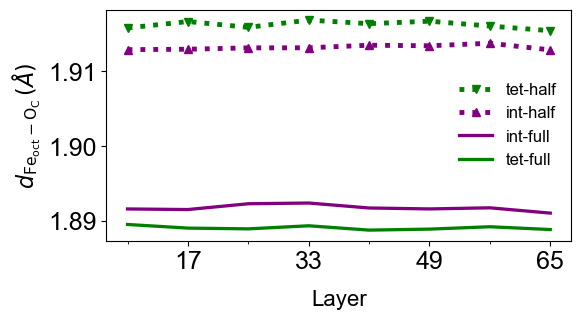

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
import numpy as np

df = pd.read_csv("geom_analyze_results1.csv", header=0)

font = {"size"   : 18,
        "family" : "Arial"}
plt.rc("font", **font)

full_tet = df[(df["coverage"] == "full") & (df["binding_site"] == "tet")]
full_int = df[(df["coverage"] == "full") & (df["binding_site"] == "int")]
half_tet = df[(df["coverage"] == "half") & (df["binding_site"] == "tet")]
half_int = df[(df["coverage"] == "half") & (df["binding_site"] == "int")]

full_tet = full_tet.reset_index(drop=True)
full_int = full_int.reset_index(drop=True)
half_tet = half_tet.reset_index(drop=True)
half_int = half_int.reset_index(drop=True)

fig, axs = plt.subplots(1, figsize=(6, 3), facecolor="w")

axs.plot(half_tet["layer"], half_tet["avg_O_Feoct_dist"], "g", linewidth=3.5, ls=':', marker='v', label="tet-half")
axs.plot(half_int["layer"], half_int["avg_O_Feoct_dist"], "purple", linewidth=3.5, ls=":", marker='^', label="int-half")

axs.plot(full_int["layer"], full_int["avg_O_Feoct_dist"], "purple", linewidth=2.35, label="int-full")
axs.plot(full_tet["layer"], full_tet["avg_O_Feoct_dist"], "g", linewidth=2.35, label="tet-full")


axs.set_ylabel(r"$d_\mathrm{Fe_{oct}-O_{C}}\, (\AA)$",
                   fontsize=16)

axs.set_xticks([17, 33, 49, 65])
axs.set_xticks([9, 17, 25, 33, 41, 49, 57, 65], minor=True)
#axs.set_yticks([2.05, 2.10, 2.15, 2.20, 2.25, 2.30], minor=True)		
# 

axs.legend(framealpha=0.0, loc='best', fontsize=12)

axs.set_xlabel(r"Layer",labelpad=12, fontsize=16) 

fig.savefig('d_fe3oxy.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('d_fe3oxy.png', dpi=300.0,format='png', bbox_inches = "tight")